In [2]:

from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
from datetime import date
from sklearn import linear_model
import scipy.stats as ss
import math
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# Examining Dataset

In [3]:
TrainData = pd.read_csv('train.csv')
TestData=pd.read_csv('test.csv')
TrainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
TrainData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


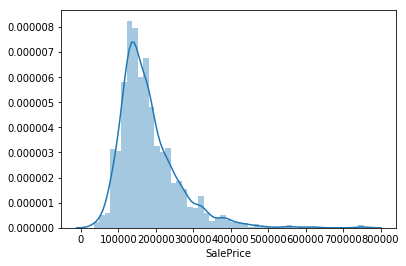

In [5]:
#Sale Price is Skewed Right
sns.distplot(TrainData['SalePrice']);

In [6]:
TrainData.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


Data Cleanup

Observed in Data Definitions that several quality measures are on different scales:
E.g. 

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Decided to normalize.

In [7]:
#Normalizing all quality measures, which are currently on different scales (10 pt numeric, 5 point categorical)
#Four 5-point scales have no N/A option: ExterQual, ExterCond,HeatingQC,KitchenQual
#These 5-point scales have N/A values: FireplaceQu,GarageQual,BsmtQual,BsmtCond,GarageCond,PoolQC
#Prior to checking correlations
for col in ('ExterQual','ExterCond','HeatingQC','FireplaceQu','GarageQual','KitchenQual','BsmtQual','BsmtCond','GarageCond','PoolQC'):
    TrainData[col]=TrainData[col].fillna(0)
    TestData[col]=TestData[col].fillna(0)
    TrainData[col][TrainData[col] == 'Ex'] = 9
    TrainData[col][TrainData[col] == 'Gd'] = 7
    TrainData[col][TrainData[col] == 'TA'] = 5
    TrainData[col][TrainData[col] == 'Fa'] = 3
    TrainData[col][TrainData[col] == 'Po'] = 1
    TrainData[col][TrainData[col] == 'NA'] = 0
    TestData[col][TestData[col] == 'Ex'] = 9
    TestData[col][TestData[col] == 'Gd'] = 7
    TestData[col][TestData[col] == 'TA'] = 5
    TestData[col][TestData[col] == 'Fa'] = 3
    TestData[col][TestData[col] == 'Po'] = 1
    TestData[col][TestData[col] == 'NA'] = 0

In [8]:
#TrainData.to_csv("TrainDataCheckin1.csv")

TrainData['LotFrontage']=TrainData['LotFrontage'].fillna(0)
TestData['LotFrontage']=TestData['LotFrontage'].fillna(0)

In [9]:
TrainData.ExterCond.astype('int64')
TrainData.ExterQual.astype('int64')
TrainData.HeatingQC.astype('int64')
TrainData.FireplaceQu.astype('int64')
TrainData.GarageQual.astype('int64')
TrainData.KitchenQual.astype('int64')
TrainData.BsmtQual.astype('int64')
TrainData.BsmtCond.astype('int64')
TrainData.GarageCond.astype('int64')
TrainData.PoolQC.astype('int64')

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
1435    0
1436    0
1437    0
1438    0
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolQC, Length: 1460, dtype: int64

In [10]:
TrainData.to_csv("TrainDataCheckin.csv")

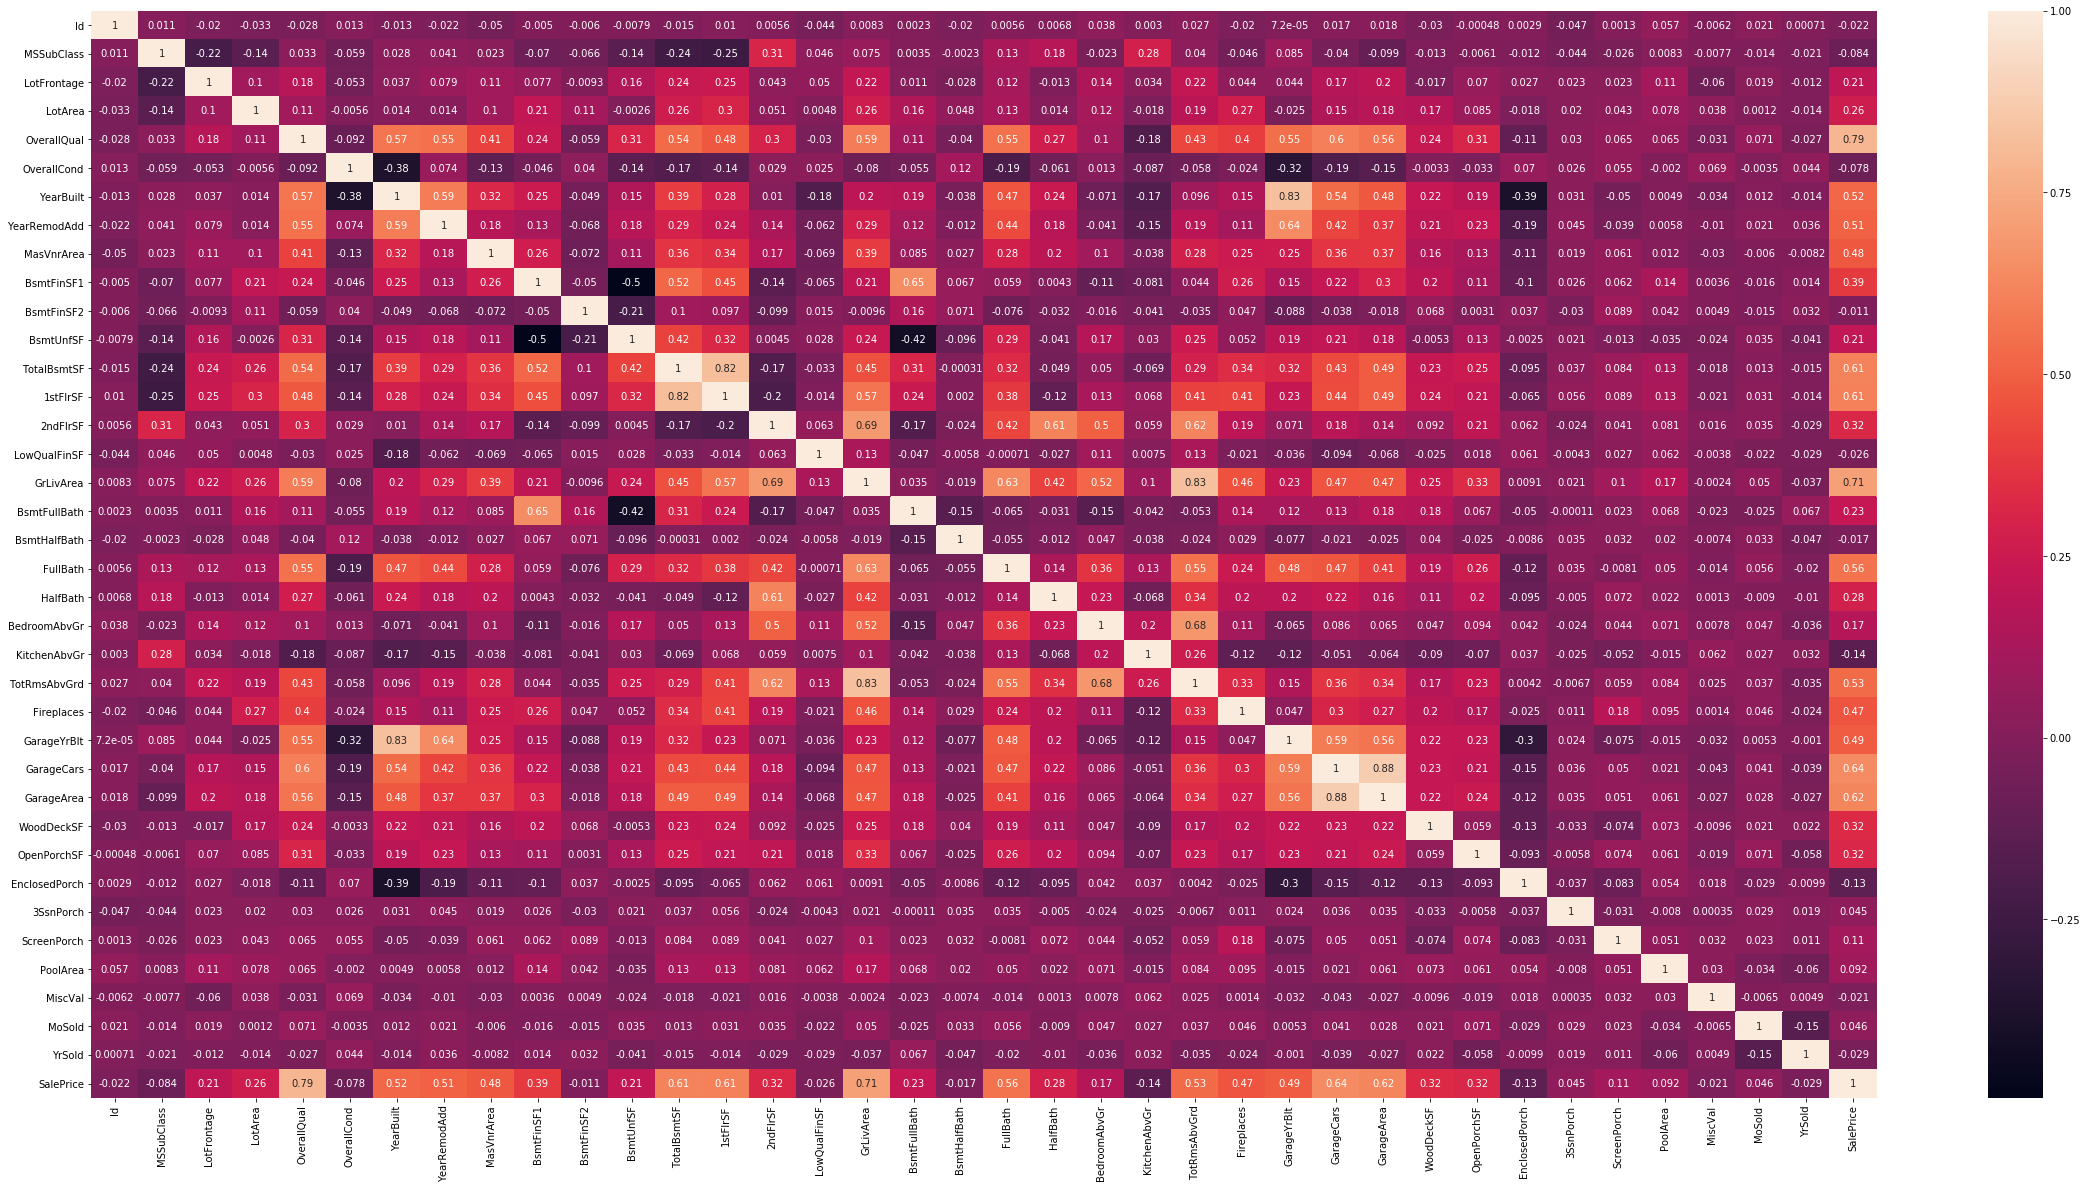

In [11]:
#Using a heatmap to check correlations
plt.figure(figsize=[40,20])
sns.heatmap(TrainData.corr(), annot=True)

In [12]:
#A lot of columns have correlation to OverallQual that is above .5. Which are these?

c = TrainData.corr()
c.to_csv("Correla.csv")
s = c.unstack()
so = s.sort_values(kind="quicksort")
so.to_csv("Correls.csv")

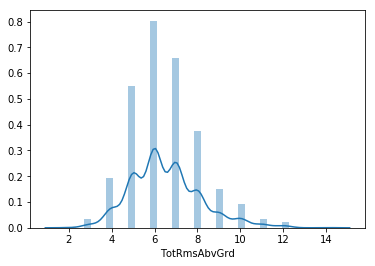

In [13]:
# Check Skew on my predictors

sns.distplot(TrainData['TotRmsAbvGrd']);




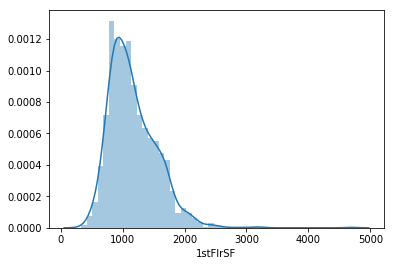

In [14]:

sns.distplot(TrainData['1stFlrSF']);


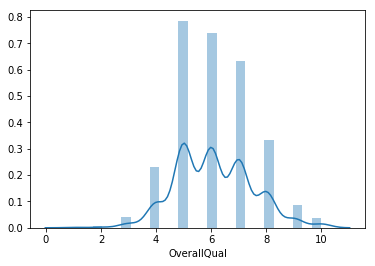

In [15]:
sns.distplot(TrainData['OverallQual']);


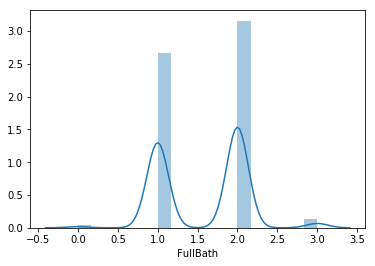

In [16]:
sns.distplot(TrainData['FullBath']);


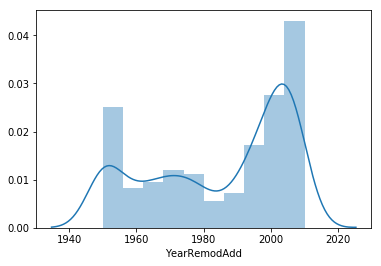

In [17]:
sns.distplot(TrainData['YearRemodAdd']);


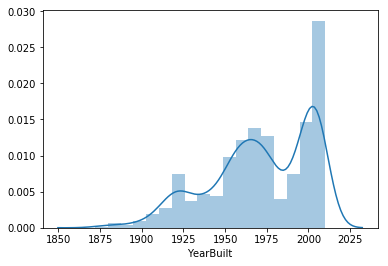

In [18]:
sns.distplot(TrainData['YearBuilt']);


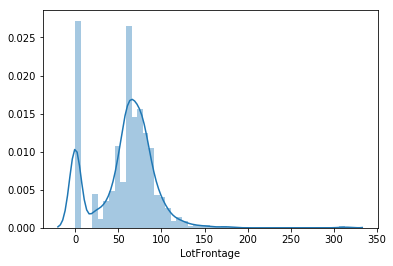

In [19]:
#sns.distplot(TrainData['ExterQual']);
sns.distplot(TrainData['LotFrontage']);

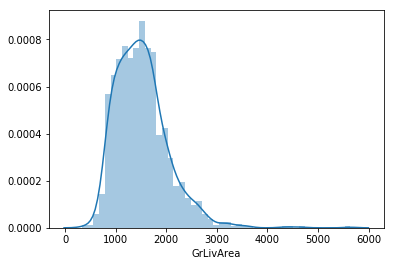

In [20]:
sns.distplot(TrainData['GrLivArea']);

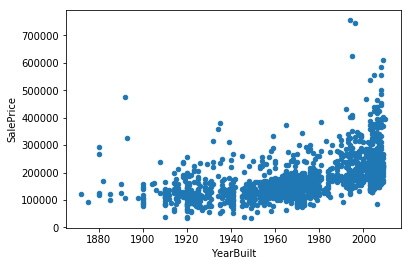

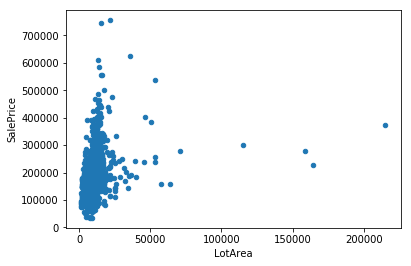

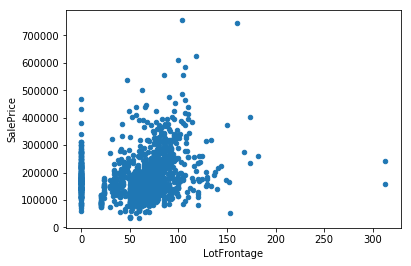

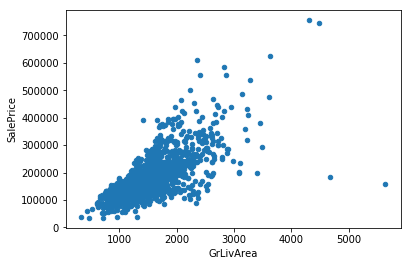

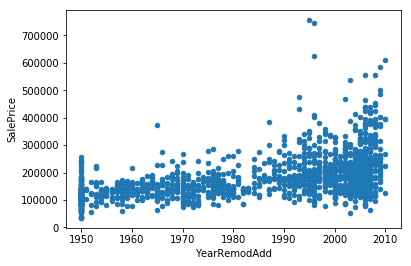

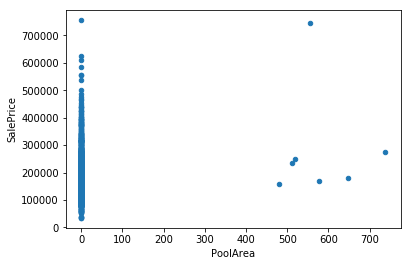

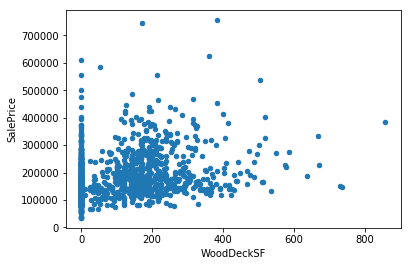

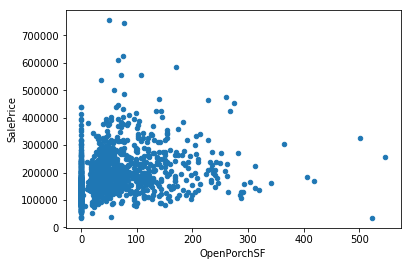

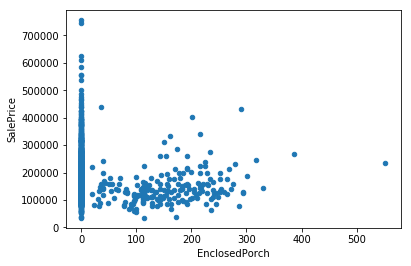

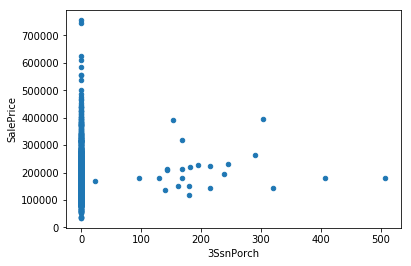

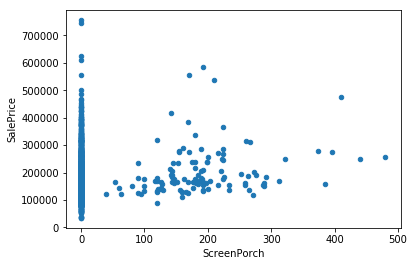

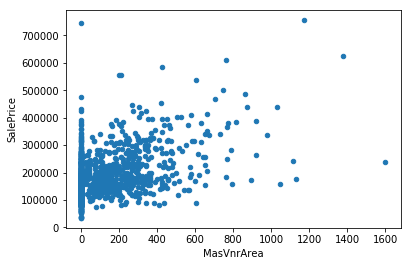

In [21]:
#Using Scatter Plots to check distributions / deeper understanding of those correlations
#Continuous variables
TrainContCols = ['YearBuilt','LotArea','LotFrontage','GrLivArea','YearRemodAdd',
            'PoolArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
            'MasVnrArea']

col_y = 'SalePrice'
def plot_scatter(TrainData, TrainContCols, y='SalePrice'):
    for col in TrainContCols:
        TrainData.plot.scatter(col,y)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(y)# Set text for y axis
        plt.show()

plot_scatter(TrainData, TrainContCols)

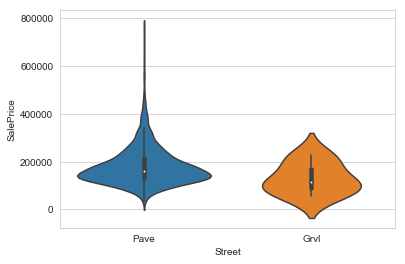

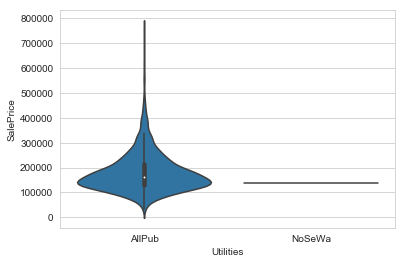

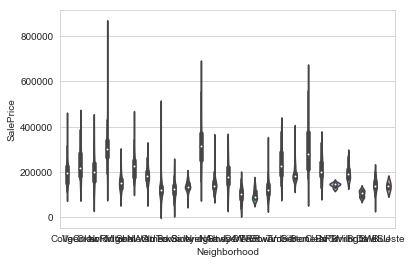

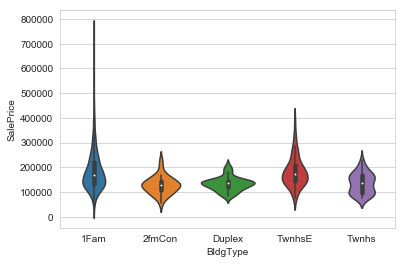

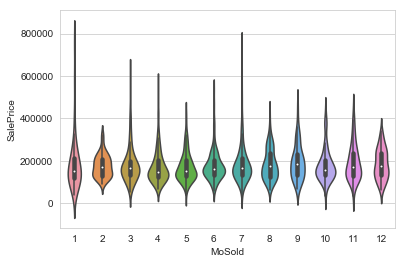

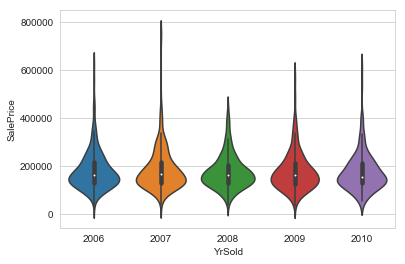

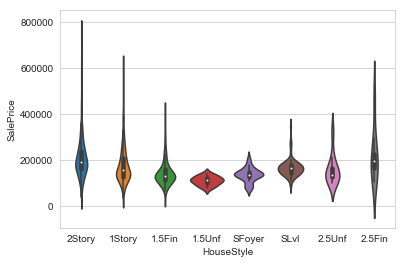

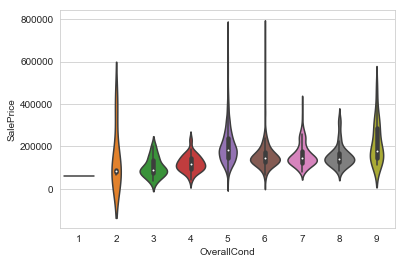

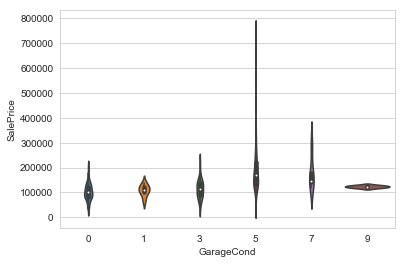

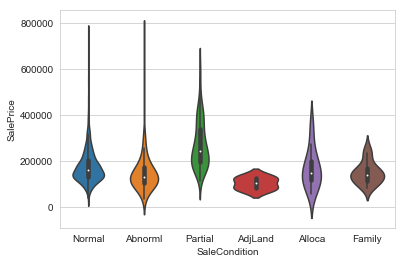

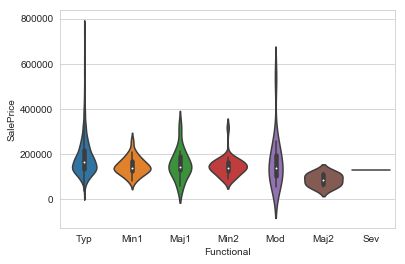

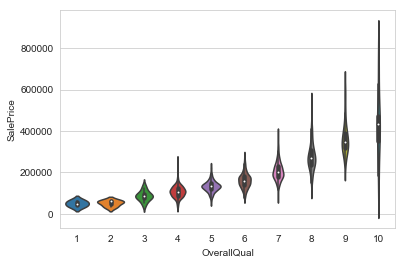

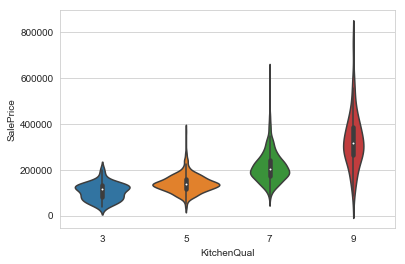

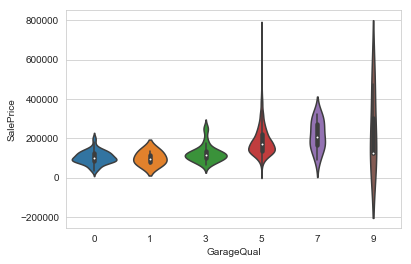

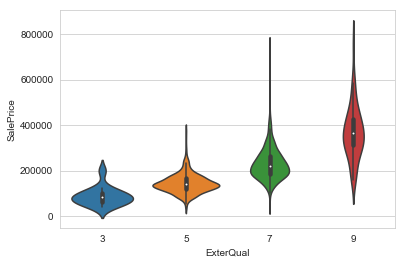

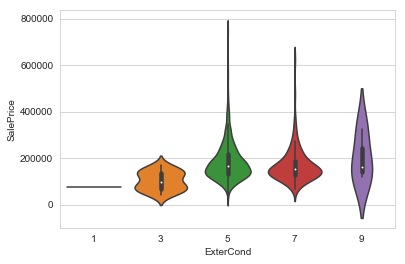

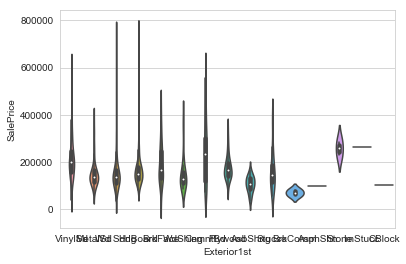

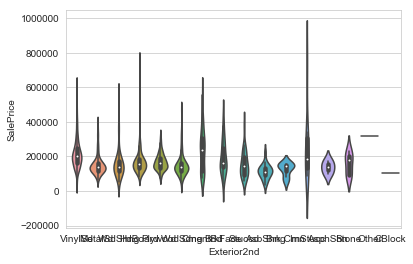

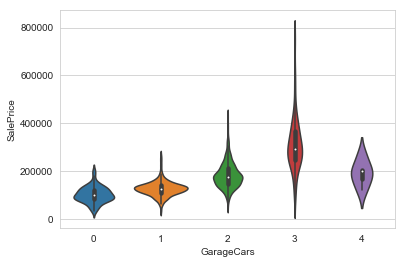

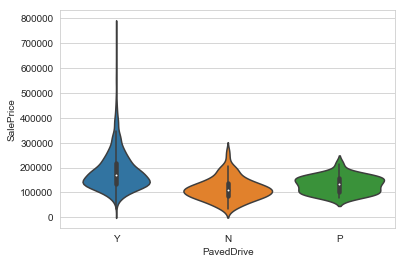

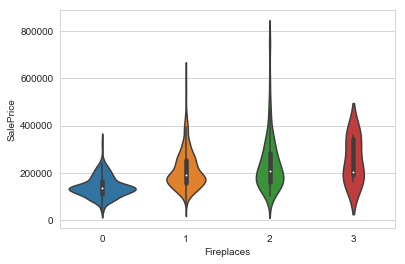

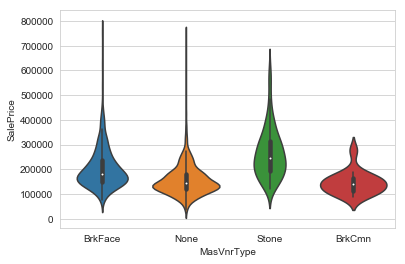

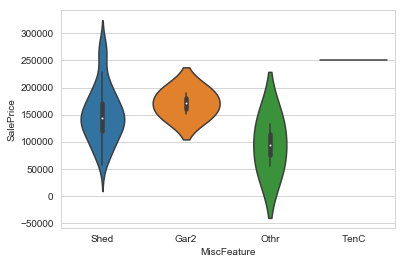

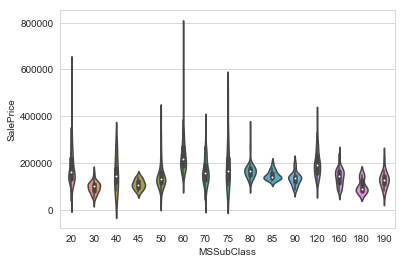

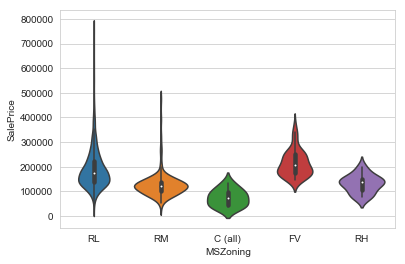

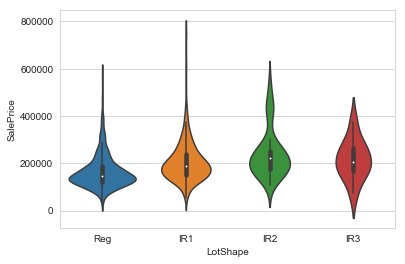

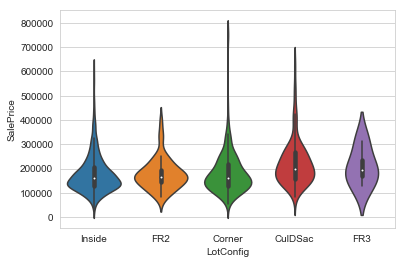

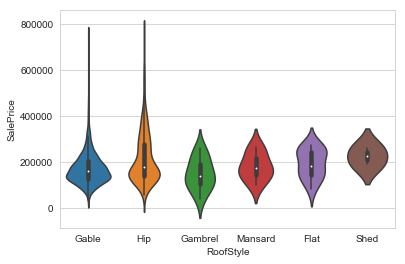

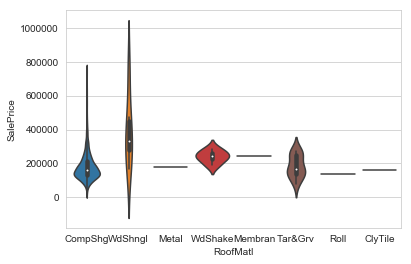

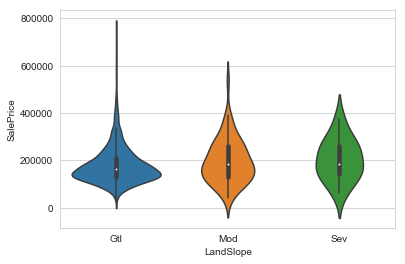

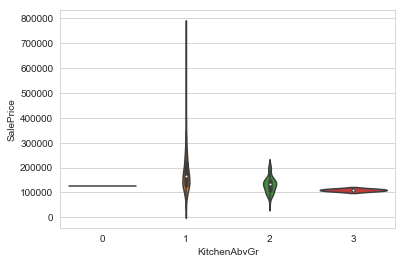

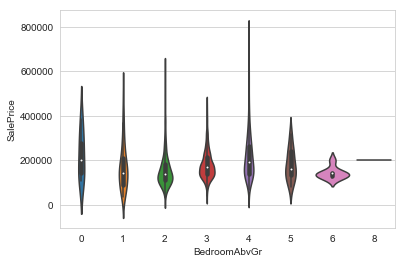

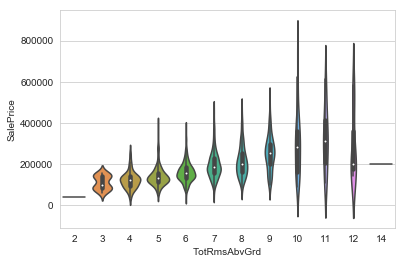

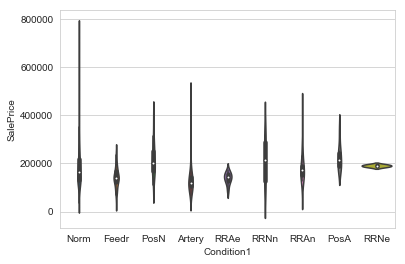

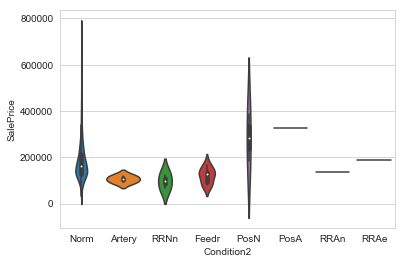

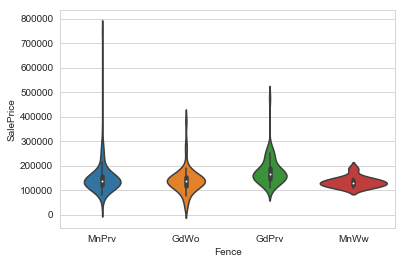

In [22]:
#Using Violin plots to check distributions, for categorical variables.
TrainCatCols = ['Street','Utilities','Neighborhood','BldgType','MoSold','YrSold','HouseStyle',
            'OverallCond','GarageCond','SaleCondition','Functional',
            'OverallQual','KitchenQual','GarageQual','ExterQual',
            'ExterCond','Exterior1st','Exterior2nd','GarageCars',
            'PavedDrive','Fireplaces','MasVnrType','MiscFeature',
            'MSSubClass','MSZoning','LotShape','LotConfig','RoofStyle',
            'RoofMatl','LandSlope','KitchenAbvGr','BedroomAbvGr','TotRmsAbvGrd',
            'Condition1','Condition2','Fence']

def plot_violin(TrainData, TrainCatCols, col_y ='SalePrice', kind ='kde'):
    for col in TrainCatCols:
        sns.set_style("whitegrid")
        sns.violinplot(col,col_y, data=TrainData)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_violin(TrainData,TrainCatCols)


Having
1. Reflected upon the logical definitions of these columns
2. Checked columns w/high correlation to sale price
3. Used charts to identify when certain categorical results have predictive potential

I've identified 24 columns as worth insertion into an initial exporatory model. Given the high # of categorical variables that I want to use, I've decided to try a decision tree model for the first attempt.

An alternative path based on regression (perhaps regression to predict a poisson distribution?) is also worth consideration. That of course would require feature engineering and normalization. 


Columns chosen for initial analysis, and why:
TotRmsAbvGrd
> Logical. Good correlation<

GrLivArea
>-- Gross living area has a good correlation.<

OverallQual
BldgType
EnclosedPorch
Fireplaces
GarageCars
HouseStyle
LotFrontage
MasVnrType
MiscFeature
MoSold
MSZoning
Neighborhood

>Certain neighborhoods DO appear to add value, in the charts.<

OpenPorchSF
PavedDrive
PoolArea
RoofMatl
ScreenPorch
Street
Utilities
WoodDeckSF
YearRemodAdd
YrSold